In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import sys
from sklearn.utils import shuffle
# add the 'src' directory as one where we can import modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Increase figure resolution 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-notebook')

<ipython-input-1-c744abb11dea>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_frame = pd.read_csv('/content/drive/MyDrive/CSE499/AllData.csv')

In [4]:
data_frame.shape

(72094, 9)

In [5]:
data_frame.head(5)

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating


<Axes: xlabel='Class', ylabel='count'>

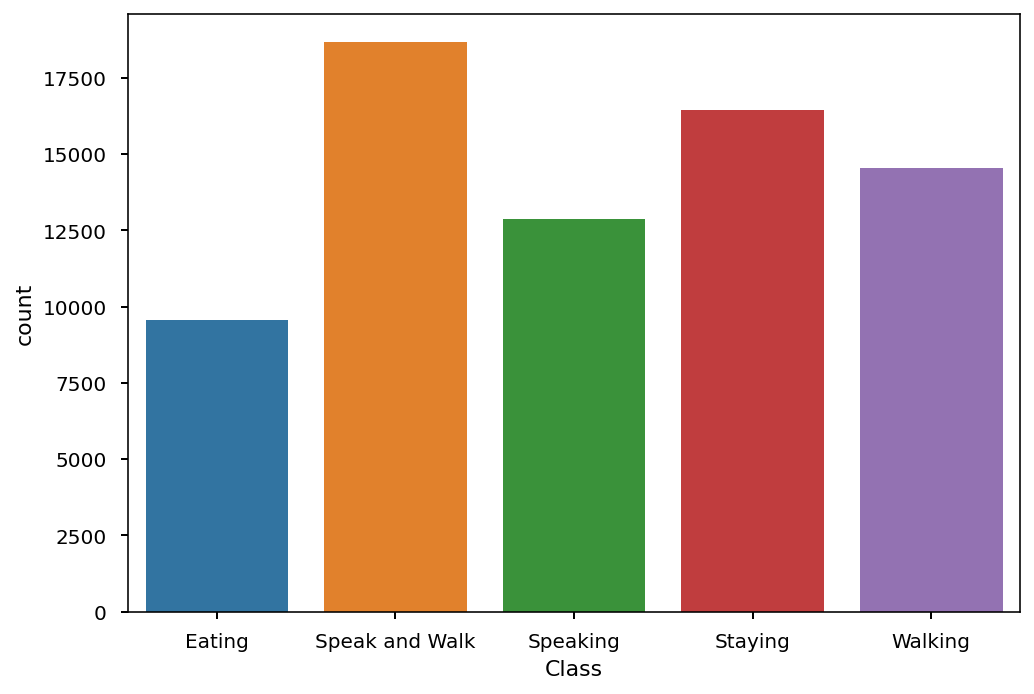

In [6]:
sns.countplot(x='Class', data=data_frame)

In [7]:
data_frame=data_frame.drop('Time',axis=1)
data_frame=data_frame.drop('Person',axis=1)

In [8]:
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
data_frame.head(3)

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Class
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,Eating
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,Eating
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,Eating


In [10]:
data_frame=data_frame.replace(['Eating','Speak and Walk','Speaking','Staying','Walking'],['1','2','3','4','5'])


In [11]:
feature_col_names = data_frame.iloc[:,:-1]

In [12]:
feature_col_names

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244
...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707


In [13]:
from sklearn.model_selection import train_test_split 
#feature_col_names = data_frame.iloc[:,:-1]
predicted_class_names = ['Class']
X = feature_col_names
Y = data_frame[predicted_class_names].values
split_test_size = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [14]:
X

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
0,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024
1,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707
2,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902
3,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244
4,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244
...,...,...,...,...,...,...
72089,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415
72090,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146
72091,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098
72092,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707


In [15]:
Y

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['5'],
       ['5'],
       ['5']], dtype=object)

In [16]:
X_train

,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z
64413,-0.922852,0.113525,-0.064331,-21.859756,13.871951,8.841463
539,-0.321167,0.890381,-0.411499,3.567073,-5.335366,-4.512195
19630,-0.818726,0.567139,0.035889,16.036585,1.859756,-10.518293
55774,-0.974243,-0.039551,-0.168579,-8.353659,1.829268,1.890244
41006,-0.879517,-0.395142,0.097412,-11.432927,-16.859756,-4.573171
...,...,...,...,...,...,...
37194,-0.816406,-0.460938,0.189819,-22.530488,-40.487805,4.786585
6265,-0.790405,0.507080,-0.417969,-9.939024,-0.121951,-3.597561
54886,-0.980225,-0.042725,-0.120361,-7.987805,0.640244,0.823171
860,-0.506958,0.814941,-0.343140,-18.018293,8.048780,12.317073


In [17]:
Y_train

array([['5'],
       ['1'],
       ['2'],
       ...,
       ['4'],
       ['1'],
       ['2']], dtype=object)

In [18]:
#  here data_frame.index is the whole data frame
print('{0:0.2f}% in training set'.format((len(X_train) / len(data_frame.index)) * 100))
print('{0:0.2f}% in test set'.format((len(X_test) / len(data_frame.index)) * 100))

85.00% in training set
15.00% in test set


# a. Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,Y_train)

<ipython-input-19-0e278935f4c6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=200)

In [20]:
predictions =rfc.predict(X_test)

In [21]:
from sklearn import metrics

print("Accuracy_Score=", format(metrics.accuracy_score(Y_test,predictions)))

Accuracy_Score= 0.8634304207119741


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.86      0.85      0.85      1407
           2       0.81      0.86      0.84      2826
           3       0.82      0.85      0.84      1996
           4       0.98      0.98      0.98      2429
           5       0.85      0.75      0.80      2157

    accuracy                           0.86     10815
   macro avg       0.86      0.86      0.86     10815
weighted avg       0.86      0.86      0.86     10815

